In [1]:
%load_ext autoreload
%autoreload 2

#Setting Up and Importing the Necessary Packages/Libraries
##Package for reading in Bruker OPUS type files
from brukeropusreader import read_file
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import pathlib
import numpy as np
import pandas as pd
#Local Functions
from hydrogenase_processing.cut_range import cut_range_subtraction, cut_range_subtraction_multiple_wv
from hydrogenase_processing.second_deriv import second_deriv, first_deriv
from hydrogenase_processing.anchor_points import get_peaks, get_start_end_anchorpoints, get_all_anchor_points
from hydrogenase_processing.vaporfit import atm_subtraction
from hydrogenase_processing.vaporfit import AtmFitParams
#testing
#find peaks
from scipy.signal import find_peaks, peak_widths


In [2]:
#Paths to Local Data
path_to_water_vapor_data = pathlib.Path("../../data/opus_files/water_vapor")
path_to_output_plots_= pathlib.Path("../../data/output_plots/")
path_to_pD8_data = pathlib.Path("../../data/opus_files/pD8")

In [3]:
#Pulling in all pD8 sample data
pD8_raw_files = list(path_to_pD8_data.iterdir())
pD8_raw_files.sort()

#Initializing dict of raw spectra files from the file system
pD8_raw_data = dict()

#Populating the raw_test_data dict with all the read in raw opus files
##Using the last 5 characters, as they are the uniquely identifying portions of each of the file names
for i in pD8_raw_files:
    if not i.name.startswith('.DS_Store'):
        pD8_raw_data[f'pD8_{i.name[-5:len(i.name)]}'] = read_file(i)

print(pD8_raw_data.keys())

dict_keys(['pD8_.0028', 'pD8_.0017', 'pD8_.0018', 'pD8_.0019', 'pD8_.0021', 'pD8_.0004', 'pD8_.0030', 'pD8_.0024', 'pD8_.0025', 'pD8_.0049', 'pD8_.0032', 'pD8_.0014', 'pD8_.0031'])


In [4]:
#Pulling in all wv data
water_vapor_files = list(path_to_water_vapor_data.iterdir())
water_vapor_files.sort()
#Initializing dict of wv_files from the file system
water_vapor_data = dict()

#Populating the water_vapor_data dict with all the read in wv opus files
#making sure names(keys) are distinct by subscripting
for i in (water_vapor_files):
    if not i.name.startswith('.DS_Store'):
        water_vapor_data[f'wv_{i.name[-6:len(i.name)]}_data'] = read_file(i)

print(water_vapor_data.keys())

dict_keys(['wv_s.0000_data', 'wv_w.0000_data', 'wv_w.0001_data', 'wv_w.0002_data', 'wv_w.0003_data', 'wv_w.0004_data'])


In [5]:
#Pulling in config file for pD6 samples
pd8_config_df = pd.read_excel("../../data/prospecpy_config.xlsx", sheet_name="hyd2_pD_8")
#Cutting names in file_name column to match the imported files
pd8_config_df["file_name"] = pd8_config_df["file_name"].apply(lambda file_name: f'pD8_{file_name[-5:len(file_name)]}') 


#Indexing the config dataframe by file_name for simultaneous parsing with the pD6_raw_data dict below
indexed_pD8_config_df = pd8_config_df.set_index('file_name')
print(indexed_pD8_config_df)

           range_start  range_end  Notes
file_name                               
pD8_.0028         2150       1850    NaN
pD8_.0017         2150       1850    NaN
pD8_.0018         2150       1850    NaN
pD8_.0019         2150       1850    NaN
pD8_.0021         2150       1850    NaN
pD8_.0018         2150       1850    NaN
pD8_.0004         2150       1850    NaN
pD8_.0030         2150       1850    NaN
pD8_.0024         2150       1850    NaN
pD8_.0025         2150       1850    NaN
pD8_.0025         2150       1850    NaN
pD8_.0025         2150       1850    NaN
pD8_.0049         2150       1850    NaN
pD8_.0024         2150       1850    NaN
pD8_.0032         2150       1850    NaN
pD8_.0024         2150       1850    NaN
pD8_.0024         2150       1850    NaN
pD8_.0014         2150       1850    NaN
pD8_.0031         2150       1850    NaN
pD8_.0018         2150       1850    NaN
pD8_.0024         2150       1850    NaN


In [6]:
#Initializing dict of post water vapor subtraction spectra
cut_range_sub_wv_data = dict()


for idx, row in indexed_pD8_config_df.iterrows():  
    print(idx)
    if idx in pD8_raw_data:
        raw_data_i = pD8_raw_data[idx]
        cut_range_sub_wv_data[f'{idx}_cut_range_sub_wv'] = cut_range_subtraction_multiple_wv(raw_data_i, water_vapor_data, row["range_start"], row["range_end"], SG_poly = 3, SG_points = 21)
    


pD8_.0028
wv_s.0000_data
wv_w.0000_data
wv_w.0001_data
wv_w.0002_data
wv_w.0003_data
wv_w.0004_data
2150.0 1850.0
959 1115
pD8_.0017
wv_s.0000_data
wv_w.0000_data
wv_w.0001_data
wv_w.0002_data
wv_w.0003_data
wv_w.0004_data
2150.0 1850.0
959 1115
pD8_.0018
wv_s.0000_data
wv_w.0000_data
wv_w.0001_data
wv_w.0002_data
wv_w.0003_data
wv_w.0004_data
2150.0 1850.0
959 1115
pD8_.0019
wv_s.0000_data
wv_w.0000_data
wv_w.0001_data
wv_w.0002_data
wv_w.0003_data
wv_w.0004_data
2150.0 1850.0
959 1115
pD8_.0021
wv_s.0000_data
wv_w.0000_data
wv_w.0001_data
wv_w.0002_data
wv_w.0003_data
wv_w.0004_data
2150.0 1850.0
959 1115
pD8_.0018
wv_s.0000_data
wv_w.0000_data
wv_w.0001_data
wv_w.0002_data
wv_w.0003_data
wv_w.0004_data
2150.0 1850.0
959 1115
pD8_.0004
wv_s.0000_data
wv_w.0000_data
wv_w.0001_data
wv_w.0002_data
wv_w.0003_data
wv_w.0004_data
2150.0 1850.0
959 1115
pD8_.0030
wv_s.0000_data
wv_w.0000_data
wv_w.0001_data
wv_w.0002_data
wv_w.0003_data
wv_w.0004_data
2150.0 1850.0
959 1115
pD8_.0024
wv_s.0

pD8_.0028_cut_range_sub_wv


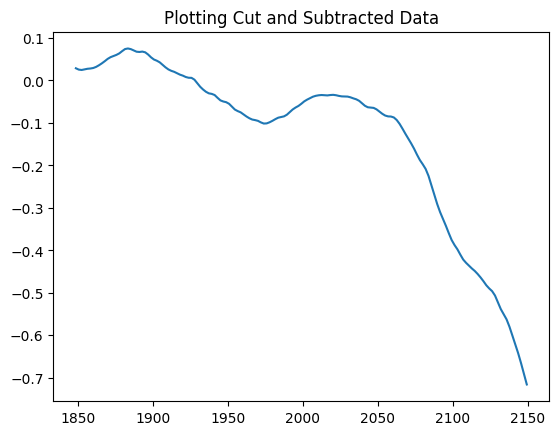

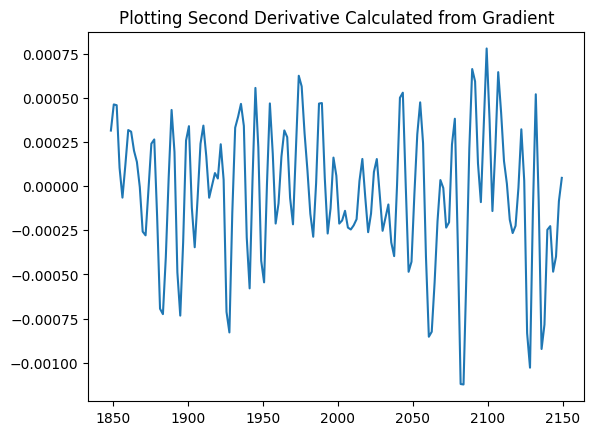

pD8_.0017_cut_range_sub_wv


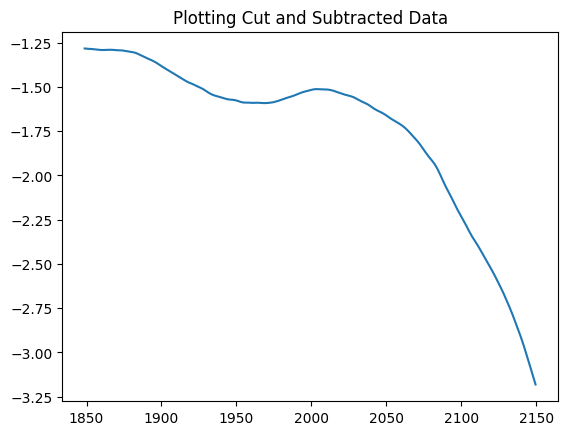

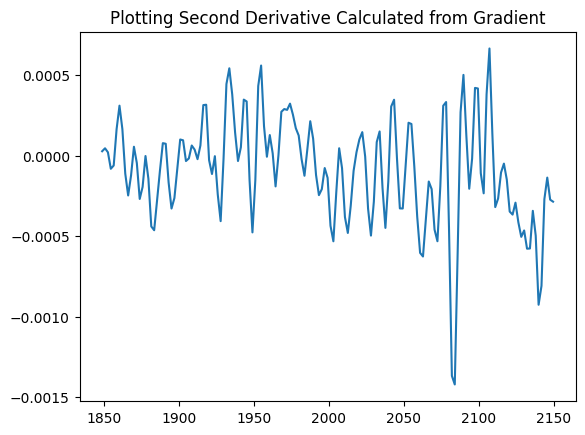

pD8_.0018_cut_range_sub_wv


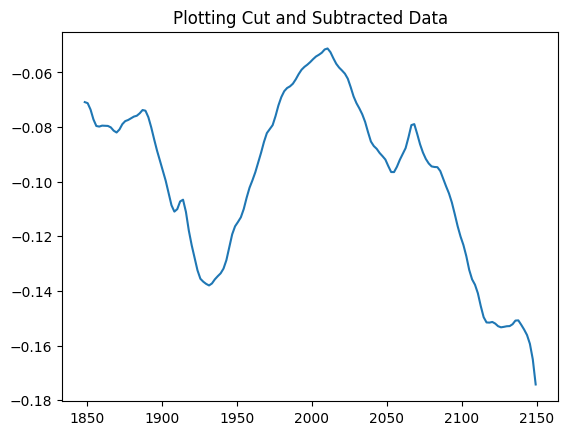

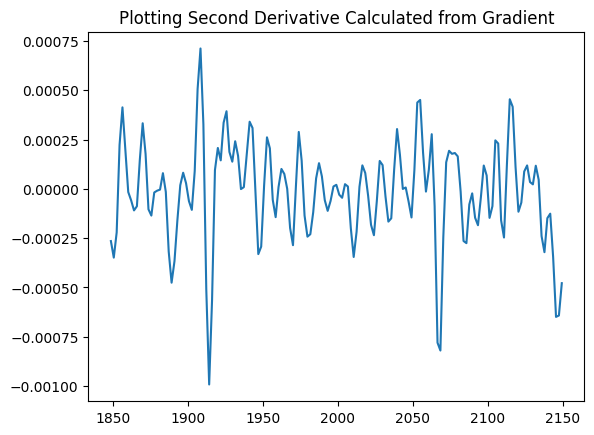

pD8_.0019_cut_range_sub_wv


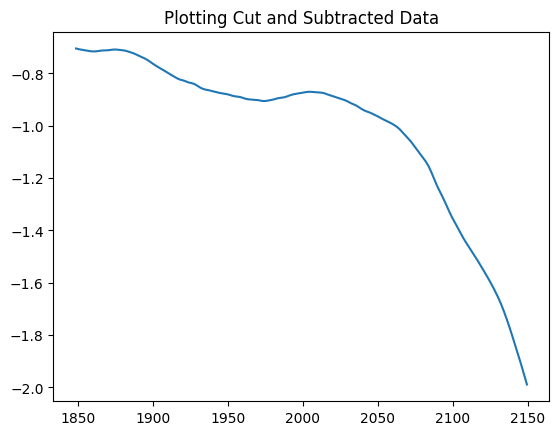

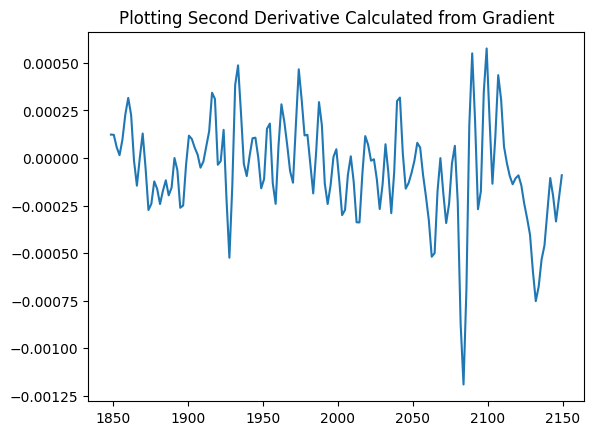

pD8_.0021_cut_range_sub_wv


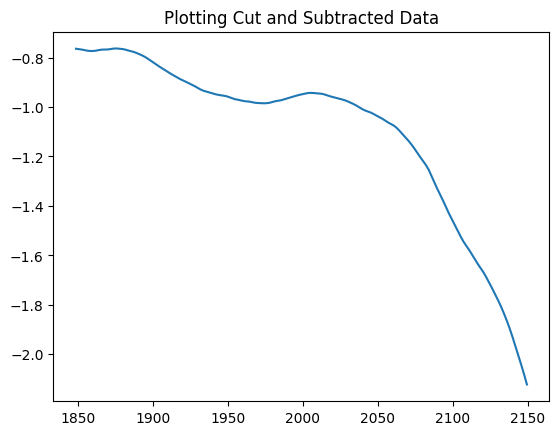

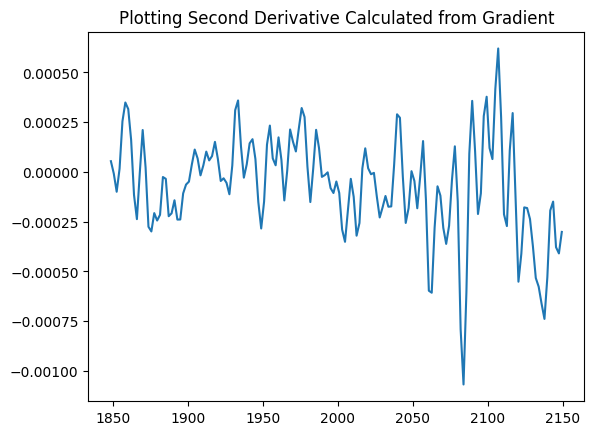

pD8_.0004_cut_range_sub_wv


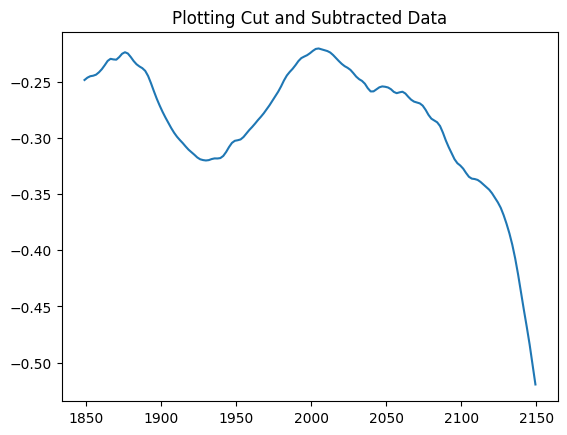

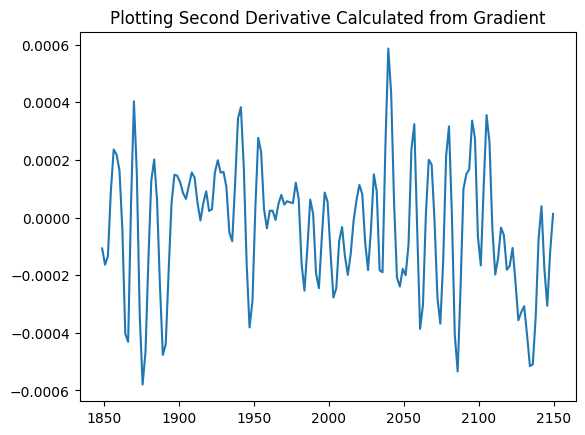

pD8_.0030_cut_range_sub_wv


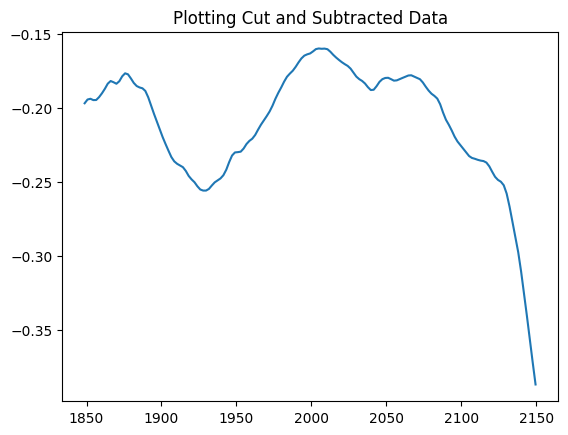

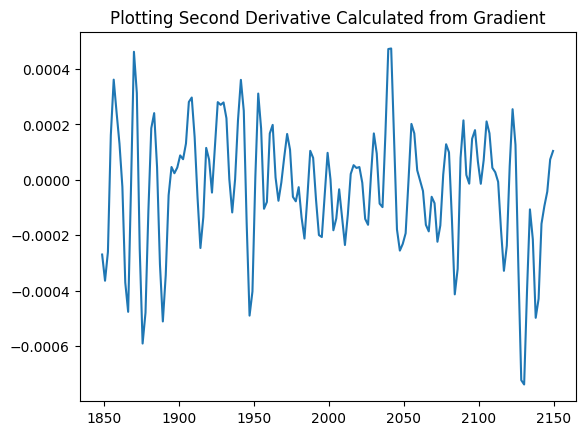

pD8_.0024_cut_range_sub_wv


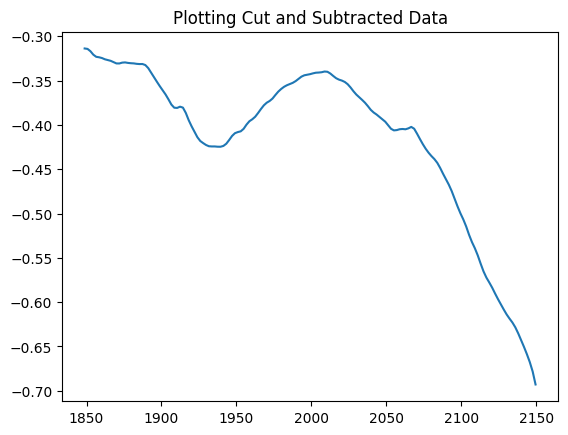

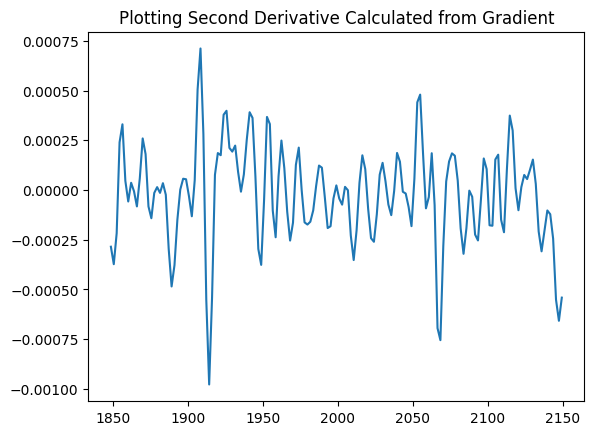

pD8_.0025_cut_range_sub_wv


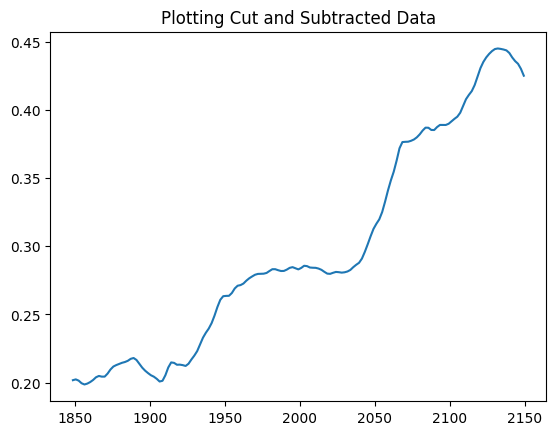

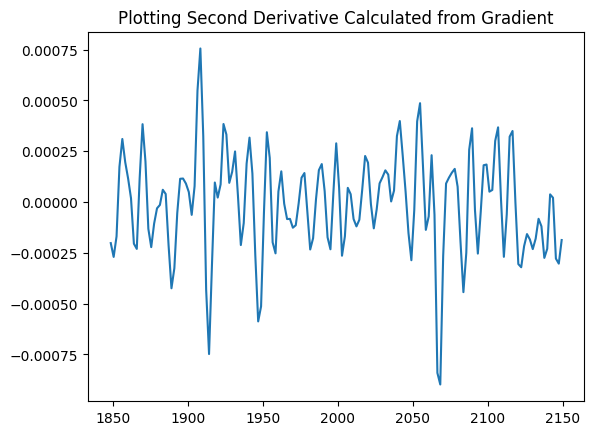

pD8_.0049_cut_range_sub_wv


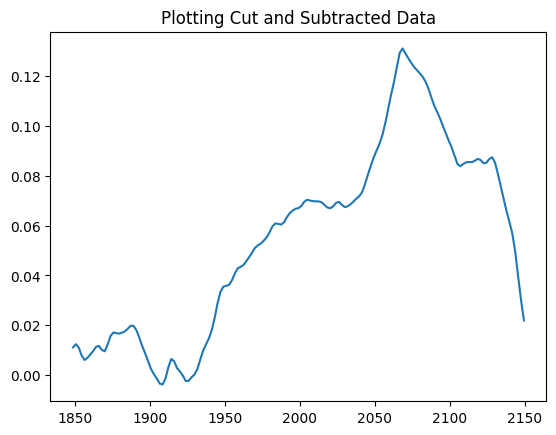

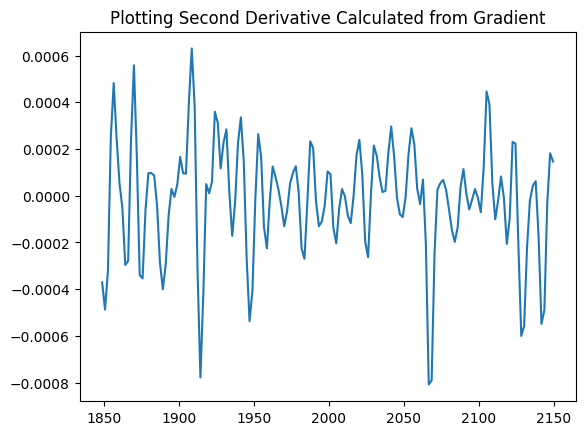

pD8_.0032_cut_range_sub_wv


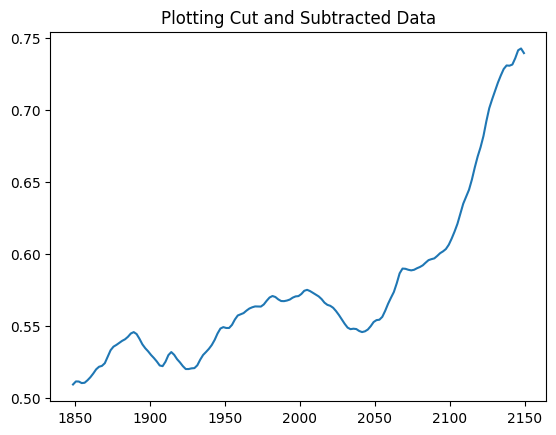

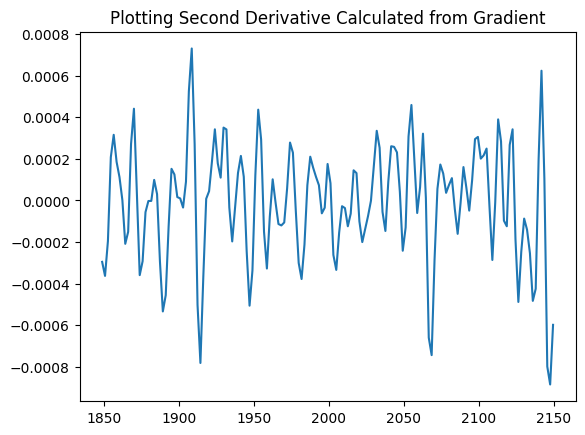

pD8_.0014_cut_range_sub_wv


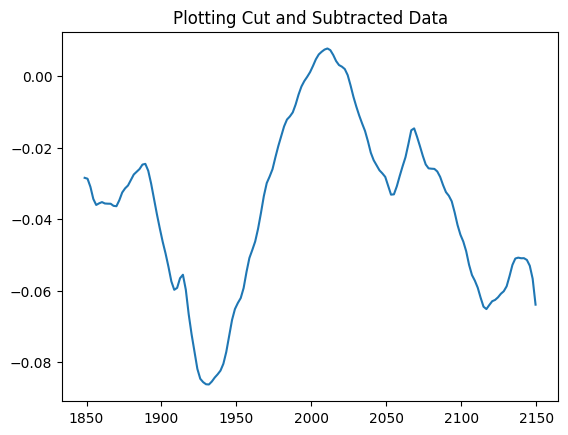

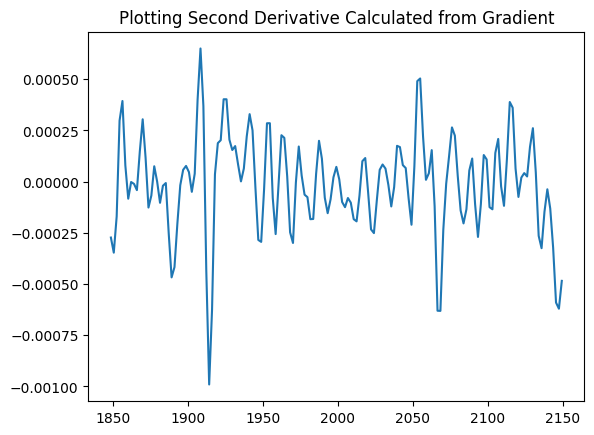

pD8_.0031_cut_range_sub_wv


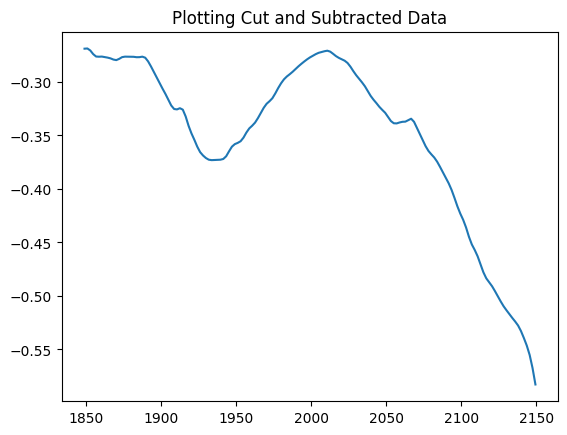

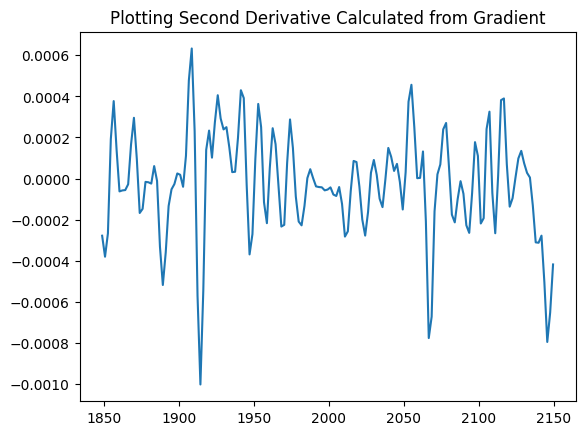

In [7]:
#Creating Empty Dict for second derivative of cut and subtracted data
second_deriv_pD8_data = dict()

#Filling it with second derivatives of all the data
for i in cut_range_sub_wv_data:
    cut_range_sub_wv_data_i = cut_range_sub_wv_data[i]
    print(i)
    second_deriv_pD8_data[f'{i}_second_deriv'] = second_deriv(cut_range_sub_wv_data_i)
